In [102]:
import pandas as pd
import numpy as np
import seaborn as sns

In [100]:
data1 = pd.read_csv('./data/3/log.txt', usecols= ['timestamp', 'mspt'], sep='\t', header=0)
data2 = pd.read_csv('./data/4/log.txt', usecols= ['timestamp', 'mspt'], sep='\t', header=0)

ys1 = pd.read_csv('./data/3/yardstick-metrics.log', sep='\t', names=["timestamp", "b", "playerNum"])
max_timestamp_1 = ys1['timestamp'][(ys1['playerNum'] > 299).idxmax()] // 1000
ys2 = pd.read_csv('./data/4/yardstick-metrics.log', sep='\t', names=["timestamp", "b", "playerNum"])
max_timestamp_2 = ys2['timestamp'][(ys2['playerNum'] > 299).idxmax()] // 1000

data1_ = data1[(data1['timestamp'] // 1000 >= ys1.iat[0, 0] // 1000) & (data1['timestamp'] // 1000 <= max_timestamp_1 if max_timestamp_1 != 0 else True)]
data1_.index = np.arange(1, len(data1_) + 1)
data1_ = data1_.drop(columns=['timestamp'])

data2_ = data2[(data2['timestamp'] // 1000 >= ys2.iat[0, 0] // 1000) & (data2['timestamp'] // 1000 <= max_timestamp_2 if max_timestamp_2 != 0 else True)]
data2_.index = np.arange(1, len(data2_) + 1)
data2_ = data2_.drop(columns=['timestamp'])

<AxesSubplot: >

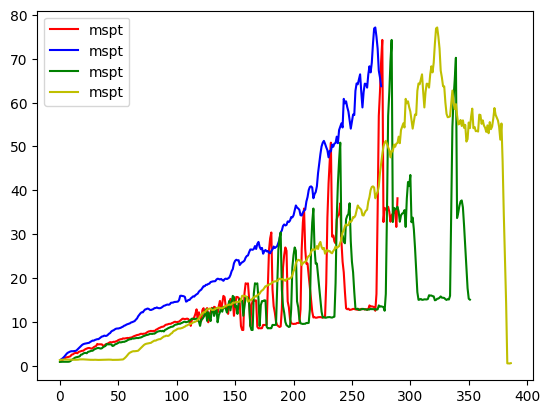

In [103]:
sns.lineplot(data1_, palette=['r'])
sns.lineplot(data2_, palette=['b'])

# original plot:
# sns.lineplot(data1.drop(columns=['timestamp']), palette=['g'])
# sns.lineplot(data2.drop(columns=['timestamp']), palette=['y'])